<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/8_Logistic_Regression_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
uploaded = files.upload()

Saving 8.Logistic Regression (Binary Classification).csv to 8.Logistic Regression (Binary Classification).csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "8.Logistic Regression (Binary Classification).csv" with length 184 bytes


In [5]:
uploaded

{'8.Logistic Regression (Binary Classification).csv': b'age,bought_insurance\r\n22,0\r\n25,0\r\n47,1\r\n52,0\r\n46,1\r\n56,1\r\n55,0\r\n60,1\r\n62,1\r\n61,1\r\n18,0\r\n28,0\r\n27,0\r\n29,0\r\n49,1\r\n55,1\r\n25,1\r\n58,1\r\n19,0\r\n18,0\r\n21,0\r\n26,0\r\n40,1\r\n45,1\r\n50,1\r\n54,1\r\n23,0\r\n'}

In [6]:
df = pd.read_csv(io.StringIO(uploaded['8.Logistic Regression (Binary Classification).csv'].decode('utf-8')))
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [7]:
df = pd.read_csv(io.StringIO(uploaded['8.Logistic Regression (Binary Classification).csv'].decode('utf-8')))
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


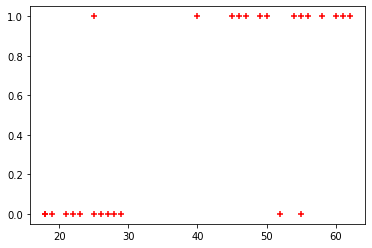

In [8]:
#now i am going to plot scatterd plot
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
#just see the data distribution
#the younger less likely to buy insurance but more age are also buy insurance

In [9]:
#now 1st thing u need to train test split method to split our data set
#if u look at over data
df.shape
#we have 27 rows

(27, 2)

In [10]:
#now training these sets and test set so use train test split method
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [14]:
X_test

,age
23,45
25,54
5,56


In [15]:
X_train

,age
7,60
12,27
9,61
8,62
26,23
13,29
17,58
10,18
4,46
19,18


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model.predict(X_test)

array([1, 1, 1])

In [21]:
model.score(X_test,y_test) #1 means our model is perfect

1.0

In [23]:
#another method try u can see that 
model.predict_proba(X_test)
#when u predict the probablity of X_test, It will show probablity of ur data sample being 1 class vs the others.
#here the 1st class is if customer will not by the insurance

array([[0.35656837, 0.64343163],
       [0.15204232, 0.84795768],
       [0.12245084, 0.87754916]])

In [27]:
model.predict([[56]]) # 1 means buy the insurance

array([1])

In [29]:
model.predict([[25]]) # 0 means not buy the insurance
#now this is working well

array([0])